# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
（1）两个节点之间的cost值必须是0或者正数（2）在选取新节点的时候按照一定的标准进行排序

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
限制 DFS 探索的深度 k，当没有结果时则探索深度 k+1，不断迭代直到找到结果 

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
当需要查找最短路径或需要较短时间时用 BFS 要比 DFS 好，；当需要较少空间存储路径时 DFS 比 BFS 要好

##### 2.4 When can we use machine learning ?
（1）存在一定的复杂模式（2）不能用简单的规则进行定义（3）有大量的数据（4）能够定义一个清晰的目标

##### 2.5 What is the gradient of a function ?
是函数在某一点的导数

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
当随着x的增加导数先为正后为负就表示该点函数的值最大

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-May

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
import os
import pandas as pd
import numpy as np
import json
import urllib
import requests
import re

In [42]:
# 参考文献 https://zhuanlan.zhihu.com/p/40988487

# 获取每个站点的名称及key
return_data = requests.get('http://m.shmetro.com/core/shmetro/mdstationinfoback_new.ashx?act=getAllStations')
temp = return_data.text
all_stations = json.loads(temp)  # 数据格式为 [{'key': 编号, 'value': 站点名称}, ...]

# 整理获取的数据，数据格式为 {'编号': 站点名称, ...} 
idx_stations = dict()
for s in all_stations:
    idx_stations.setdefault(s['key'], s['value'])

In [43]:
idx_stations

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

In [140]:
# 获取站点经纬度
return_data = requests.get('http://service.shmetro.com/skin/js/pca.js')
p = re.compile('var gis = ({.*?})', re.S)
temp = re.findall(p, return_data.text)
temp = eval(temp[0])  # 数据格式为 {'编号': '经度, 纬度', ...}

# 把数据中的字符串 '经度, 纬度' 转化为 (经度, 纬度)
locations = dict()
for key, item in location.items():
    lat, lon = item.split(',')
    locations.setdefault(idx_stations[key], (float(lat), float(lon)))

In [146]:
locations

{'七宝': (121.356047, 31.161397),
 '三林': (121.517551, 31.148698),
 '三林东': (121.529691, 31.152393),
 '三门路': (121.514701, 31.318613),
 '上南路': (121.512956, 31.154788),
 '上大路': (121.414775, 31.321458),
 '上海体育场': (121.450248, 31.19218),
 '上海体育馆': (121.442801, 31.188348),
 '上海儿童医学中心': (121.52979, 31.209399),
 '上海动物园': (121.373597, 31.196049),
 '上海南站': (121.43627, 31.161142),
 '上海图书馆': (121.450434, 31.213992),
 '上海大学': (121.395296, 31.326259),
 '上海汽车城': (121.18725, 31.291581),
 '上海游泳馆': (121.448026, 31.185365),
 '上海火车站': (121.462366, 31.253608),
 '上海科技馆': (121.550621, 31.225524),
 '上海西站': (121.410075, 31.268278),
 '上海赛车场': (121.232625, 31.337944),
 '上海马戏城': (121.458503, 31.285845),
 '世纪公园': (121.557067, 31.216069),
 '世纪大道': (121.533264, 31.235004),
 '东安路': (121.461154, 31.197304),
 '东宝兴路': (121.486639, 31.265746),
 '东川路': (121.426326, 31.024468),
 '东方体育中心': (121.487012, 31.159351),
 '东昌路': (121.521058, 31.239393),
 '东明路': (121.517488, 31.17825),
 '东靖路': (121.595327, 31.296804),
 '中兴路': (121.475

In [142]:
# 获取每条线路的信息
return_data = requests.get('http://service.shmetro.com/skin/js/pca.js')
p = re.compile('var lines = ({.*?})', re.S)
temp = re.findall(p, return_data.text)
lines = eval(temp[0])

In [167]:
for line, stations in lines.items():
    print(line)
    for station in stations:
        station_name = idx_stations[station] if station in idx_stations else '未知站点'
        
        print(station_name, ' ', end='')
    print('\n')

1号线
莘庄  外环路  莲花路  锦江乐园  上海南站  漕宝路  上海体育馆  徐家汇  衡山路  常熟路  陕西南路  黄陂南路  人民广场  新闸路  汉中路  上海火车站  中山北路  延长路  上海马戏城  汶水路  彭浦新村  共康路  通河新村  呼兰路  共富新村  宝安公路  友谊西路  富锦路  

2号线
徐泾东  虹桥火车站  虹桥2号航站楼  淞虹路  北新泾  威宁路  娄山关路  中山公园  江苏路  静安寺  南京西路  人民广场  南京东路  陆家嘴  东昌路  世纪大道  上海科技馆  世纪公园  龙阳路  张江高科  金科路  广兰路  唐镇  创新中路  华夏东路  川沙  凌空路  远东大道  海天三路  浦东国际机场  

3号线
上海南站  石龙路  龙漕路  漕溪路  宜山路  虹桥路  延安西路  中山公园  金沙江路  曹杨路  镇坪路  中潭路  上海火车站  宝山路  东宝兴路  虹口足球场  赤峰路  大柏树  江湾镇  殷高西路  长江南路  淞发路  张华浜  淞滨路  水产路  宝杨路  友谊路  铁力路  江杨北路  

4号线
上海体育馆  宜山路  虹桥路  延安西路  中山公园  金沙江路  曹杨路  镇坪路  中潭路  上海火车站  宝山路  海伦路  临平路  大连路  杨树浦路  浦东大道  世纪大道  浦电路  蓝村路  塘桥  南浦大桥  西藏南路  鲁班路  大木桥路  东安路  上海体育场  

5号线
莘庄  春申路  银都路  颛桥  北桥  剑川路  东川路  金平路  华宁路  文井路  闵行开发区  江川路  西渡  萧塘  奉浦大道  环城东路  望园路  金海湖  奉贤新城  

6号线
东方体育中心  灵岩南路  上南路  华夏西路  高青路  东明路  高科西路  临沂新村   上海儿童医学中心  蓝村路  浦电路   世纪大道  源深体育中心  民生路  北洋泾路  德平路  云山路  金桥路  博兴路  五莲路  巨峰路  东靖路  五洲大道  洲海路  外高桥保税区南站  航津路  外高桥保税区北站  港城路  

7号线
美兰湖  罗南新村  潘广路  刘行  顾村公园  祁华路  上海大学  南陈路  上大路  场中路  大场镇  行知路  大华三路 

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [174]:
# 根据线路信息，获取每个站点之间的连接信息

station_connections = dict()

for l in lines.values():
    # 把站点编号替换成站点名称，去掉没有编号或者没有位置信息的站点
    line = [idx_stations[idx] for idx in l 
            if idx in idx_stations.keys() and idx_stations[idx] in locations.keys()]
    
    # 每条线路的站点数量
    station_num = len(line)
    
    # 首站的连接站点只有下一站
    # 第二个站点至倒数第二个站点之间的连接站点包括上一站和下一站
    # 末站的连接站点只有上一站
    
    for i in range(station_num):
        
        # 当前站点的名称
        current_station = line[i]
        station_connections.setdefault(current_station, set())
            
        # 添加上一个站点的连接信息
        if i - 1 in range(station_num):
            last_station = line[i - 1]
            station_connections[current_station].add(last_station)
        
        # 添加下一个站点的连接信息
        if i + 1 in range(station_num):
            next_station = line[i + 1]
            station_connections[current_station].add(next_station)

In [175]:
station_connections

{'七宝': {'中春路', '星中路'},
 '三林': {'三林东', '东方体育中心'},
 '三林东': {'三林', '浦三路'},
 '三门路': {'殷高东路 ', '江湾体育场'},
 '上南路': {'华夏西路', '灵岩南路'},
 '上大路': {'南陈路', '场中路'},
 '上海体育场': {'东安路'},
 '上海体育馆': {'宜山路', '徐家汇', '漕宝路'},
 '上海儿童医学中心': {'临沂新村 ', '蓝村路'},
 '上海动物园': {'虹桥1号航站楼', '龙溪路'},
 '上海南站': {'漕宝路', '石龙路', '锦江乐园'},
 '上海图书馆': {'交通大学', '陕西南路'},
 '上海大学': {'南陈路', '顾村公园'},
 '上海汽车城': {'安亭', '昌吉东路'},
 '上海游泳馆': {'徐家汇', '龙华'},
 '上海火车站': {'中山北路', '中潭路', '宝山路', '汉中路'},
 '上海科技馆': {'世纪公园', '世纪大道'},
 '上海西站': {'李子园', '真如'},
 '上海赛车场': {'嘉定北', '昌吉东路'},
 '上海马戏城': {'延长路', '汶水路'},
 '世纪公园': {'上海科技馆', '龙阳路'},
 '世纪大道': {'上海科技馆', '东昌路', '商城路', '杨高中路', '浦东大道', '浦电路', '浦电路 ', '源深体育中心'},
 '东安路': {'上海体育场', '大木桥路', '肇嘉浜路', '龙华中路'},
 '东宝兴路': {'宝山路', '虹口足球场'},
 '东川路': {'剑川路', '金平路'},
 '东方体育中心': {'三林', '凌兆新村', '杨思', '灵岩南路', '龙耀路'},
 '东昌路': {'世纪大道', '陆家嘴'},
 '东明路': {'成山路', '高科西路', '高青路'},
 '东靖路': {'五洲大道', '巨峰路'},
 '中兴路': {'曲阜路', '西藏北路'},
 '中华艺术宫': {'耀华路', '西藏南路'},
 '中山公园': {'娄山关路', '延安西路', '江苏路', '金沙江路'},
 '中山北路': {'上海火车站', '延长路'},
 '中春路'

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [176]:
import networkx as nx
import matplotlib.pyplot as plt

# Windows 中文乱码
# plt.rcParams['font.sans-serif'] = ['SimHei']

# Mac 中文乱码
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.rcParams['axes.unicode_minus'] = False

In [177]:
station_graph = nx.Graph(station_connections)

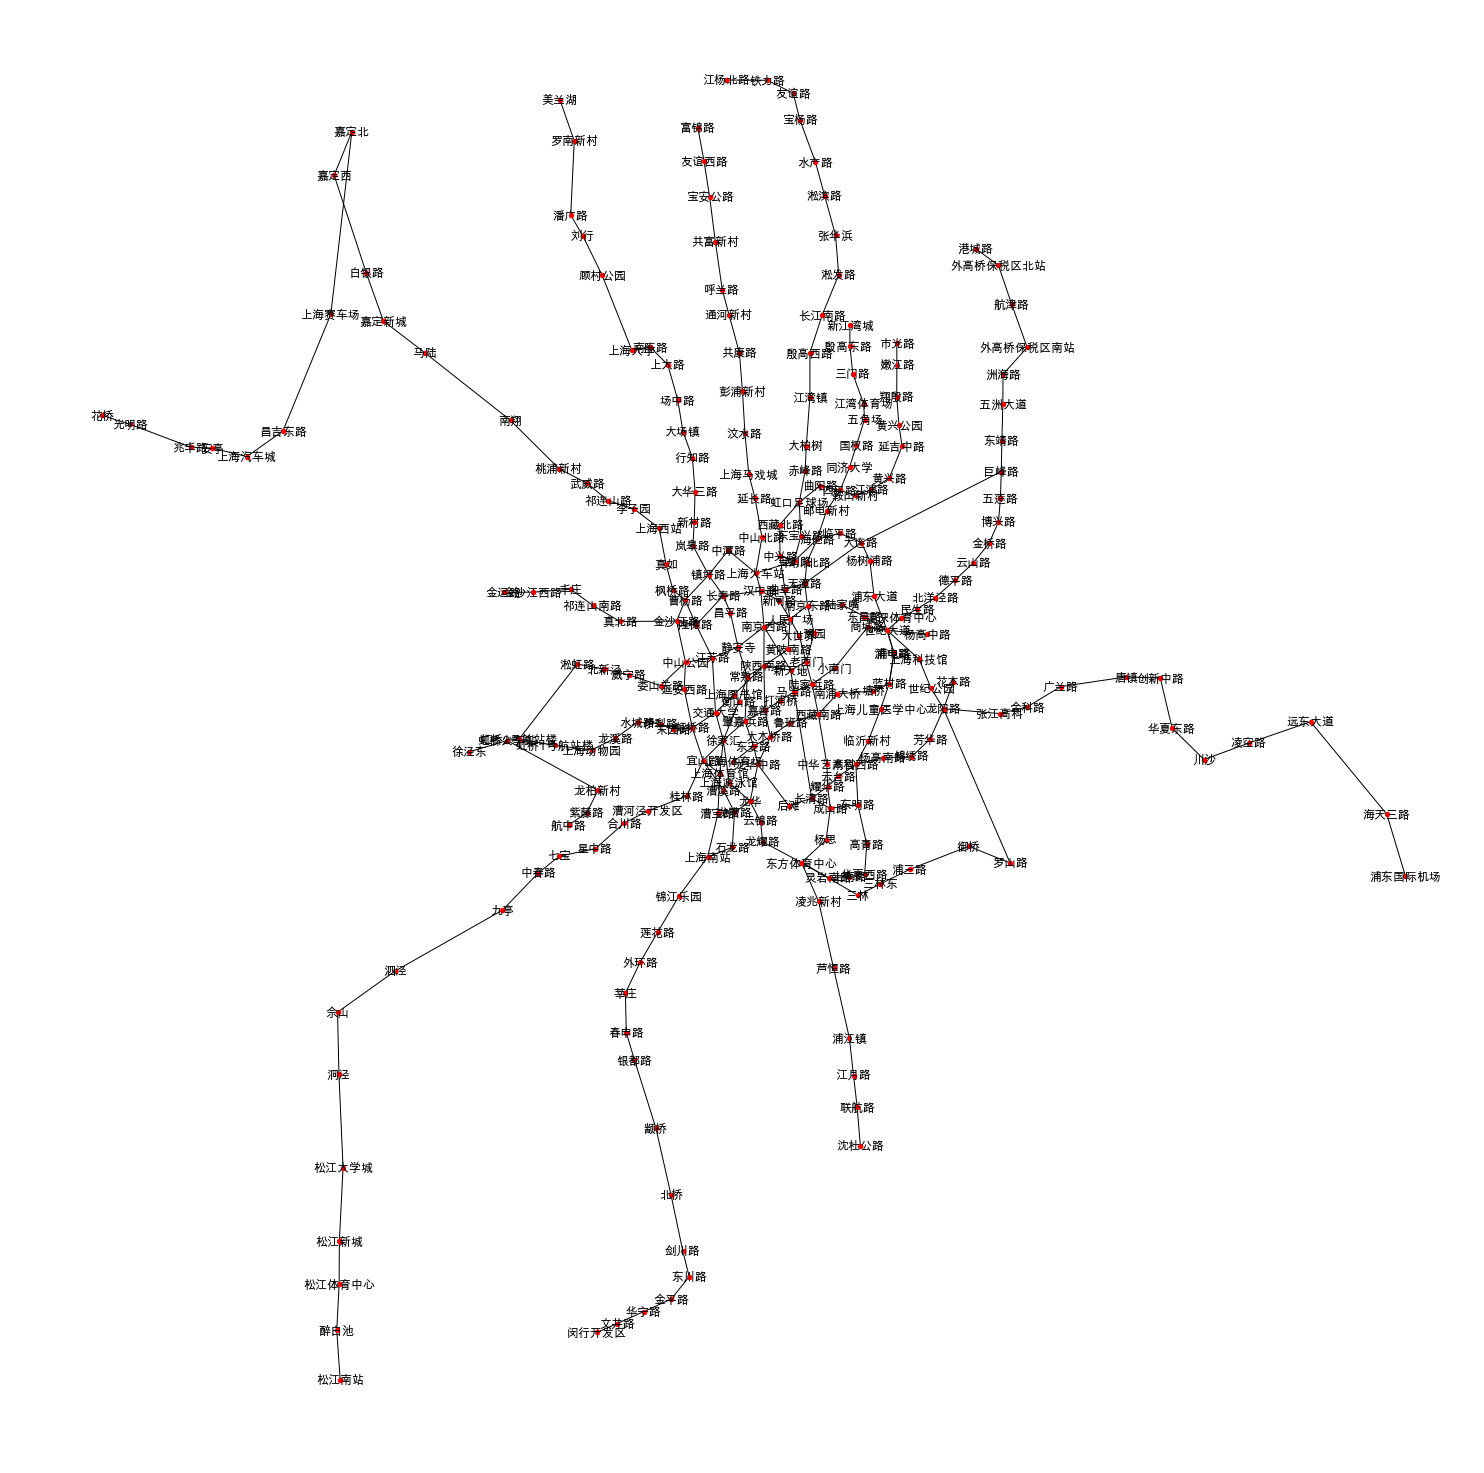

In [178]:
plt.figure(figsize=(20, 20))
nx.draw(station_graph, locations, with_labels=True, node_size=20)

In [179]:
def search_1(graph, start, destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set()  # set 用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  # 提取第一条路径，从原路径中删除
        froniter = path[-1]   # 获取路径中最后一个节点（即将要探索的节点）
        
        if froniter in visited: 
            continue  # 如果路径的最后一个节点已经探索过，则不用再探索，此时该路径被抛弃
            
        successsors = graph[froniter]
        
        for city in successsors:      # 遍历子节点
            if city in path: 
                continue  # 检查会不会形成环，防止路径向上探索
                
            # 如果存在向下的节点，则会生成并保存新的路径
            # 如果不存在向下的节点，会直接跳过并抛弃原来的路径
            
            new_path = path + [city]
            
            pathes.append(new_path)  # bfs 将新路径加到list最后面，优先探索未探索过的路径
            # pathes = [new_path] + pathes  # dfs 将新路径加到list最前面，优先探索已探索过的路径
            
            if city == destination:  # 检查目的地是不是已经搜索到了
                return new_path
            
        visited.add(froniter)  # 把该节点加入已探索的节点

In [180]:
search_1(station_connections, '上海火车站', '昌吉东路')

['上海火车站',
 '中潭路',
 '镇坪路',
 '曹杨路',
 '枫桥路',
 '真如',
 '上海西站',
 '李子园',
 '祁连山路',
 '武威路',
 '桃浦新村',
 '南翔',
 '马陆',
 '嘉定新城',
 '白银路',
 '嘉定西',
 '嘉定北',
 '上海赛车场',
 '昌吉东路']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 